# Sequential 

Neste notebook, vamos criar um autoencoder com algumas camadas tanto na rede encoder quanto na rede decoder. Encoder e decoder serão redes simétricas.  

Existem três maneiras de especificar um modelo em Keras. A mais simples e direta é quando instanciamos o modelo usando a classe **Sequential **. Objetos desta classe são compostos por uma lista ordenada de camadas, cada camada sendo limitada a um único tensor como entrada e um único tensor como saída. As outras maneiras de especificar modelos em Keras serão cobertas em outros notebooks. 

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# instanciamos um objeto chamado "model" pertencente à classe de modelo Sequential 
model = Sequential()

# empilhamos as camadas sucessivas a partir da entrada usando o método .add
model.add(Dense(128, activation='relu', input_dim=784))

# O argumento de entrada do método .add é uma camada instanciada.
# Acima, instaciamos um objeto da classe Dense.
# Cada camada será uma rede densamente conectada (MultiLayer Perceptron ou MLP)
# Especicando a 1a camada escondida com 128 nós e ativação relu
# Note que a camada de entrada está especificada também.

# Adicionando a segunda e terceira camadas do encoder
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Agora vamos especificar a última camada do encoder, a camada CODE
# Vamos usar dois nós (ou apenas dois números float) como representação de uma 
# imagem 28 x 28. Será que conseguimos uma representação boa com uma compressão 
# tão extrema? 
model.add(Dense(2, activation='relu')) 

# Agora começcamos a empilhar as camadas do decoder. As camadas serão versões 
# simétricas das camadas do encoder
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))

# A última camada agora, a saída, que gera um vetor com a mesma dimensão que a 
# entrada, uma imagem 28 x 28 representada como um array com 784 entradas.
model.add(Dense(784, activation='sigmoid')) 

In [ ]:
# O método "compile" configura o modelo para treinamento.
# Existem vários argumentos possíveis. Os mais fundamentais 
# são strings especificando o otimizador a ser usado e a 
# função de perda a ser minimizada

model.compile(optimizer='adam', loss='binary_crossentropy')

# Resumo do modelo especificado usando o método ".summary" no objeto "model"
model.summary()

In [ ]:
# Load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
x_train shape = (60000, 784)
x_test shape = (10000, 784)


In [ ]:
# Fitting the data
# O métodod ".fit" treina o modelo por um número fixo de épocas (números de passadas no 
# conjunto de dados completo) em blocos de batch_size exemplos.

model.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_test, x_test))

# A maneira usual de usar .fit é chamar model.fit(x, y, etc.)
# com x sendo as features e y sendo a resposta 
# Como estamos ajustando um autoencoder, as features de entrada e a resposta são idênticas
# Outro argumento do método é "validation_data", uma tupla (x_val, y_val) 
# de Numpy arrays or tensors. Novamente, usamos os mesmos dados x_test nas duas
# entradas da tupla. 

Epoch 1/50
235/235 [==============================] - 5s 16ms/step - loss: 0.3000 - val_loss: 0.2353
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2253 - val_loss: 0.2155
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2121 - val_loss: 0.2078
Epoch 4/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2046 - val_loss: 0.2009
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1989 - val_loss: 0.1965
Epoch 6/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1950 - val_loss: 0.1935
Epoch 7/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1922 - val_loss: 0.1912
Epoch 8/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1901 - val_loss: 0.1898
Epoch 9/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1885 - val_loss: 0.1880
Epoch 10/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1871 - val_lo

## Resultado

Podemos obter resultados muito melhores (um valor menor para a loss) se usarmos um CODE com menos compressão. Estamos comprimindo em apenas duas dimensões. Assim, a loss no conjunto de treinamento começa com 0.30 (e com 0.23 no conjunto de validação) baixando para 0.17 no fim do treinamento. Podemos obter uma loss bem menor com outras redes (veja o notebook com oa autoencoder convolucional). 

In [ ]:
# O método "predict" gera previsões de saída para as amostras de entrada.
# Argumento principal é o conjunto de features de entrada para as quais queremos 
# fazer predições, usualmente um array numpy

out_imgs = model.predict(x_test, batch_size=256)


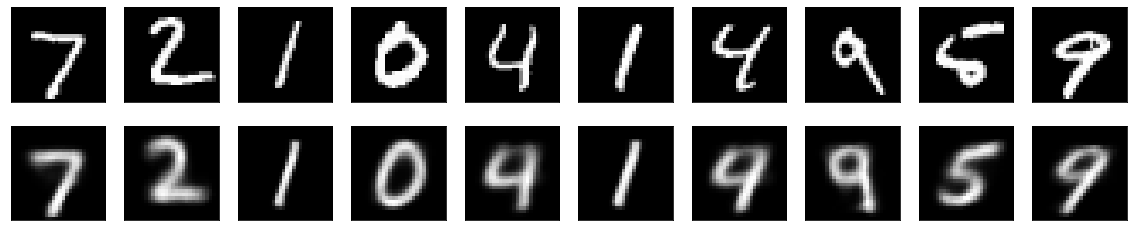

In [ ]:
# Visualizando algumas entradas do conjunto de teste e a representação através 
# do autoencoder

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1) # 10 plots na primeira linha 
  plt.imshow(x_test[i].reshape(28, 28)) # mostrando como imagem
  plt.gray()
  ax.get_xaxis().set_visible(False) # omitindo os eixos coordenados
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n) # 10 plots na segunda linha 
  plt.imshow(out_imgs[i].reshape(28,28)) # usando as reconstruções 
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
plt.show()

## UAU!!! Muito bom!!!

Eu fico muito surpreso com a qualidade da recuperação pois usamos um CODE com dimensão 2. Vejam como esta representação é capaz de diferenciar entre dígitso 9 que tem sua "perninha" inclinada para a direita ou para a esquerda. Por outro lado, os 4's não foram bem recuperados, ficando meio parecidos com 9's. 